In [13]:
!pip3 install -U ucimlrepo 
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install imblearn

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import timeit



In [15]:
from ucimlrepo import fetch_ucirepo

#Loads the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

#X contains the independent variables and y contains the dependent variables
X = heart_disease.data.features
y = heart_disease.data.targets

#Create the DataFrame for the dataset
variables_df = pd.DataFrame(heart_disease.variables)

#Extract the names of the feature columns
feature_columns = variables_df[variables_df['role'] == 'Feature']['name'].tolist()

#Create a DataFrame with the features
df = pd.DataFrame(X, columns=feature_columns)

#Add the target variable to the DataFrame
df['target'] = y

#Display the first few rows of the DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Binarizer

#Data Preprocessing 

#Handle missing values if any
df = df.dropna()

#Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

#Flatten target into 0/1
binarizer = Binarizer(threshold=0)
df['target'] = binarizer.fit_transform(df[['target']])
print(df.head())

#Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the data
scaler = StandardScaler()
# scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)


   age  trestbps  chol  thalach  oldpeak   ca  target  sex_0  sex_1   cp_1  \
0   63       145   233      150      2.3  0.0       0  False   True   True   
1   67       160   286      108      1.5  3.0       1  False   True  False   
2   67       120   229      129      2.6  2.0       1  False   True  False   
3   37       130   250      187      3.5  0.0       0  False   True  False   
4   41       130   204      172      1.4  0.0       0   True  False  False   

   ...  restecg_1  restecg_2  exang_0  exang_1  slope_1  slope_2  slope_3  \
0  ...      False       True     True    False    False    False     True   
1  ...      False       True    False     True    False     True    False   
2  ...      False       True    False     True    False     True    False   
3  ...      False      False     True    False    False    False     True   
4  ...      False       True     True    False     True    False    False   

   thal_3.0  thal_6.0  thal_7.0  
0     False      True     False  


In [17]:
#Model Training and Evaluation
def train_and_evalaute_model(model, model_name, monitor_loss=False):
    #Train model
    start = timeit.default_timer()
    model.fit(X_train, y_train)
    stop = timeit.default_timer()

    #Predict on the test set
    y_pred = model.predict(X_test)

    #Evaluate the model
    model_results = pd.DataFrame([{
        'Model': model_name,
        'Runtime': stop - start,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }])
    print(model_results.to_string(index=False))

    #Monitor loss if required
    if monitor_loss and hasattr(model, 'loss_curve_'):
        loss_values = model.loss_curve_
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
        plt.title('Loss over Epochs for Neural Network')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

    return model_results


In [18]:
from sklearn.svm import SVC, NuSVC

#Train an SVM model
svm = SVC()
svm_results = train_and_evaluate_model(svm, 'SVM')

NameError: name 'train_and_evaluate_model' is not defined

In [ ]:
#Baseline Models:Neural Network
from sklearn.neural_network import MLPClassifier

#Train a Neural Network model
nn = MLPClassifier(random_state=42, max_iter=500)
nn_results = train_and_evalaute_model(nn, 'Neural Network', monitor_loss=True)

         Model  Accuracy  Precision   Recall       F1
Neural Network  0.883333   0.882961 0.883333 0.882891


/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Baseline Models: Random Forest

from sklearn.ensemble import RandomForestClassifier

#Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf_results = train_and_evaluate_model(rf, 'Random Forest')

        Model  Accuracy  Precision   Recall       F1
Random Forest  0.833333   0.833333 0.833333 0.833333


In [ ]:
#Baseline Models: KNN

from sklearn.neighbors import KNeighborsClassifier

#Train a K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn_results = train_and_evaluate_model(knn, 'K-Nearest Neighbors')

              Model  Accuracy  Precision   Recall       F1
K-Nearest Neighbors  0.916667   0.916569 0.916667 0.916351


              Model  Accuracy  Precision   Recall       F1
                SVM  0.900000   0.900478 0.900000 0.899177
     Neural Network  0.883333   0.882961 0.883333 0.882891
      Random Forest  0.833333   0.833333 0.833333 0.833333
K-Nearest Neighbors  0.916667   0.916569 0.916667 0.916351


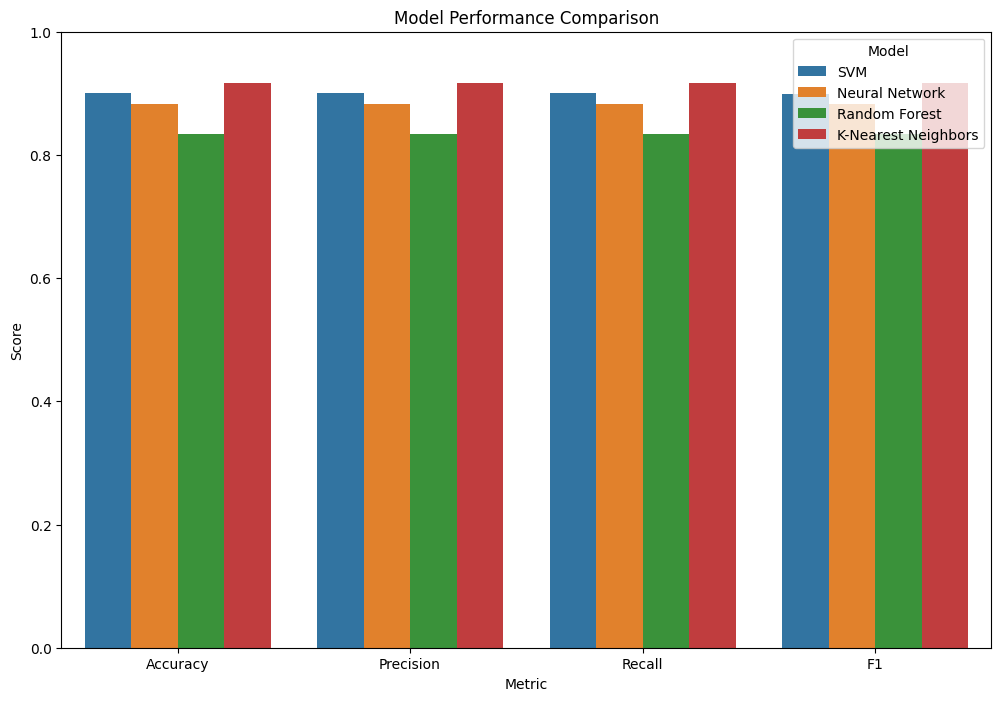

In [ ]:
#Summarize the performance of all models
performance = pd.concat([svm_results, nn_results, rf_results, knn_results], ignore_index=True)

#Print the performance DataFrame
print(performance.to_string(index=False))

#Pivot the DataFrame to have metrics as rows and models as columns
performance_pivot = performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

#Plot the performance metrics for comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_pivot)
plt.ylim(0, 1)  # Adjust the y-axis limits to reduce vertical space
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_svm = GridSearchCV(svm, param_grid_svm, scoring='accuracy')
train_and_evaluate_model(grid_svm, 'GridSearch SVM')
print("Best SVM parameters:", grid_svm.best_params_)


         Model  Accuracy  Precision   Recall      F1
GridSearch SVM  0.866667   0.866507 0.866667 0.86557
Best SVM parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(knn, param_grid_knn, scoring='accuracy')
train_and_evaluate_model(grid_knn, 'GridSearch KNN')
print("Best KNN parameters:", grid_knn.best_params_)

         Model  Accuracy  Precision   Recall       F1
GridSearch KNN  0.883333   0.882961 0.883333 0.882891
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}


In [ ]:
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],

}
grid_nn = GridSearchCV(nn, param_grid_nn, scoring='accuracy')
train_and_evaluate_model(grid_nn, 'GridSearch NN')
print("Best NN parameters:", grid_nn.best_params_)

/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.1

        Model  Accuracy  Precision   Recall       F1
GridSearch NN  0.883333   0.882961 0.883333 0.882891
Best NN parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}


/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]

}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy')
train_and_evaluate_model(grid_rf, 'GridSearch RF')
print("Best RF parameters:", grid_rf.best_params_)

        Model  Accuracy  Precision   Recall       F1
GridSearch RF  0.883333   0.884571 0.883333 0.883702
Best RF parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


/home/parallels/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/home/parallels/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/parallels/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/parallels/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
    ('knn', KNeighborsClassifier(**grid_knn.best_params_)),
    ('svm', SVC(**grid_svm.best_params_)),
    ('nn', MLPClassifier(random_state=42, **grid_nn.best_params_)),
    ('rf', RandomForestClassifier(random_state=42, **grid_rf.best_params_)),
]

stack = StackingClassifier(estimators=estimators)

train_and_evaluate_model(stack, 'Ensemble')



/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/parallels/.local/lib/python3.1

   Model  Accuracy  Precision  Recall       F1
Ensemble       0.9   0.900478     0.9 0.899177


,Model,Accuracy,Precision,Recall,F1
0,Ensemble,0.9,0.900478,0.9,0.899177


In [ ]:
#Computes the correlation matrix
correlation_matrix = df.corr()

#Plots the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()